In [46]:
import pathlib
from itertools import islice

import matplotlib
import matplotlib.pyplot as plt
import polyflexmd.data_analysis.plot.plot_system as plot_system
import polyflexmd.data_analysis.data.read as read
import polyflexmd.data_analysis.transform.transform as transform
import pathlib

import pandas as pd

import polyflexmd.data_analysis.data.types as types
import typing

import numpy as np

In [47]:
initial_system = read.read_lammps_system_data(pathlib.Path("/home/egor/Projects/polyflexmd/data/fene_test_init1.data"))
initial_system.atoms

,molecule-ID,type,x,y,z,ix,iy,iz
1,1,1,0.000000,0.000000,0.000000,0,0,0
2,1,1,0.025162,0.053709,0.968185,0,0,0
3,1,2,0.089119,0.112747,1.934272,0,0,0
4,1,2,0.070940,0.174282,2.902147,0,0,0
5,1,2,0.112628,0.162739,3.871183,0,0,0
...,...,...,...,...,...,...,...,...
1276,10,2,-57.403075,-60.328701,-66.941590,0,0,0
1277,10,2,-57.077182,-61.141772,-67.358255,0,0,0
1278,10,2,-56.799228,-61.959528,-67.799748,0,0,0
1279,10,2,-56.468047,-62.787242,-68.181991,0,0,0


In [48]:
initial_system.box.bounds

[[-100.0, 100.0], [-100.0, 100.0], [-100.0, 100.0]]

In [49]:
initial_atoms_unfolded = transform.unfold_coordinates_df(initial_system.atoms, initial_system)
initial_atoms_unfolded

,molecule-ID,type,x,y,z,ix,iy,iz
1,1,1,0.000000,0.000000,0.000000,0,0,0
2,1,1,0.025162,0.053709,0.968185,0,0,0
3,1,2,0.089119,0.112747,1.934272,0,0,0
4,1,2,0.070940,0.174282,2.902147,0,0,0
5,1,2,0.112628,0.162739,3.871183,0,0,0
...,...,...,...,...,...,...,...,...
1276,10,2,-57.403075,-60.328701,-66.941590,0,0,0
1277,10,2,-57.077182,-61.141772,-67.358255,0,0,0
1278,10,2,-56.799228,-61.959528,-67.799748,0,0,0
1279,10,2,-56.468047,-62.787242,-68.181991,0,0,0


(<Figure size 1000x1000 with 1 Axes>, <Axes3D: >)

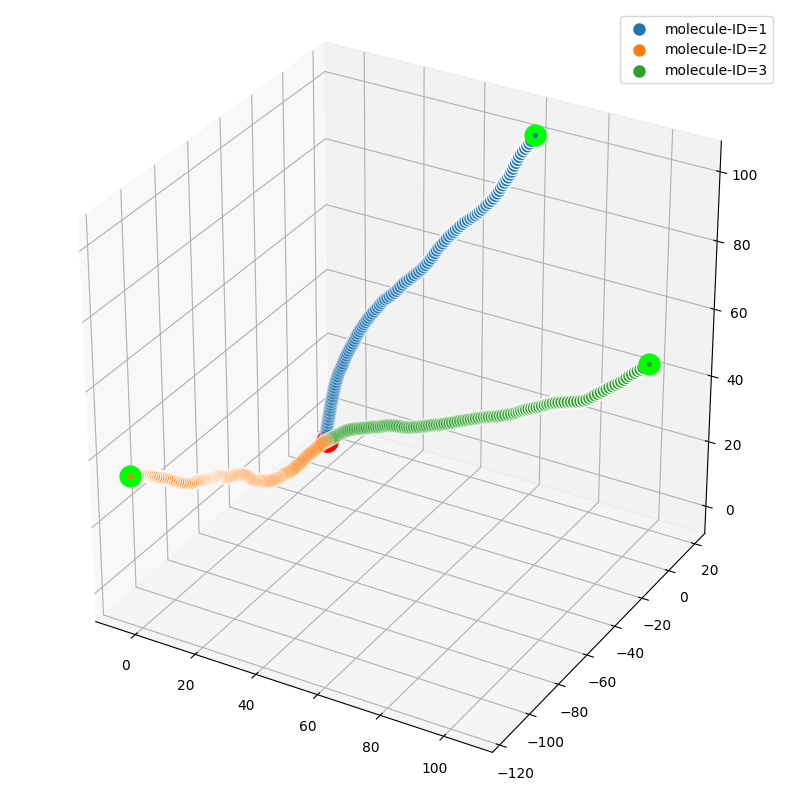

In [50]:
def plot_initial_system(
        initial_system_atoms_unfolded: pd.DataFrame,
        system: types.LammpsSystemData,
        molecules: typing.Union[int, list[int]],
        plot_box: bool = False
) -> tuple[plt.Figure, plt.Axes]:
    fig: plt.Figure = plt.figure(figsize=(10, 10))
    ax: plt.Axes = fig.add_subplot(1, 1, 1, projection="3d")
    ax.set_box_aspect([1, 1, 1])

    # for i in range(n_molecules):
    #    axs.append(fig.add_subplot(n_molecules, 1, i))

    molecules_sample = np.array(molecules)

    if type(molecules) is int:
        molecules_sample: np.ndarray = np.random.choice(
            a=initial_system_atoms_unfolded["molecule-ID"].unique(),
            size=molecules,
            replace=False
        )

    initial_state_sample: pd.DataFrame = initial_system_atoms_unfolded.loc[initial_system_atoms_unfolded["molecule-ID"].isin(molecules_sample)]

    if plot_box:
        plot_system.plot_cube(system.box.bounds, ax)

    colors = list(islice(matplotlib.colors.TABLEAU_COLORS, len(molecules)))

    for color, (mol_id, df_mol) in zip(colors, initial_state_sample.groupby("molecule-ID")):
        ax.scatter(df_mol["x"].iloc[0], df_mol["y"].iloc[0], df_mol["z"].iloc[0], s=100, color=color, edgecolors="red",
                   linewidth=6)
        ax.scatter(df_mol["x"], df_mol["y"], df_mol["z"], s=100, ec="w", label=f"molecule-ID={mol_id}")
        ax.scatter(df_mol["x"].iloc[-1], df_mol["y"].iloc[-1], df_mol["z"].iloc[-1], s=100, color=color,
                   edgecolors="lime",
                   linewidth=6)
        ax.plot(
            df_mol["x"],
            df_mol["y"],
            df_mol["z"],
            color="tab:gray"
        )

    ax.legend()

    return fig, ax

plot_initial_system(initial_atoms_unfolded, initial_system, initial_system.atoms["molecule-ID"].unique()[:3], plot_box=False)